Solar min/max examples
---

In [2]:
from helpers_data import load_data, data_dir
from helpers_plot import figdir

import numpy as np
import matplotlib.colors as mcolor
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt

from sunpy.coordinates.sun import carrington_rotation_number

In [3]:
results = {'min': data_dir / 'gong/20/20200301_000400.npz',
           'max': data_dir / 'gong/20/20131219_010400.npz'}

In [5]:
all_data = {key: load_data([results[key]]) for key in results}

2228.0
2145.0


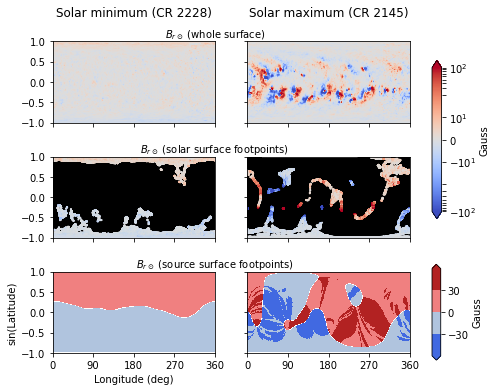

In [7]:
fig, all_axs = plt.subplots(nrows=3, ncols=2,
                            sharex=True, sharey=True,
                            figsize=(8, 6))

for axs, key in zip(all_axs.T, ['min', 'max']):
    data = all_data[key]
    print(np.round(carrington_rotation_number(data['time'].values[0])))
    # Photospheric map
    ax = axs[0]
    cmap = 'coolwarm'
    norm = mcolor.SymLogNorm(vmin=-100, vmax=100, linthresh=20, base=10)
    input_map = data.loc['b_all'].values.reshape(180, 360)
    s_phot = ax.imshow(input_map, cmap=cmap, norm=norm, extent=[0, 360, -1, 1],
                       origin='lower', rasterized=True)
    
    # Open field in photosphere
    ax = axs[1]
    s = ax.scatter(data.loc['lons'],
               np.sin(np.deg2rad(data.loc['lats'])),
               c=data.loc['b_feet'],
               cmap=cmap,
               norm=norm, s=1,
               rasterized=True)
    ax.set_fc('black')
    
    # Open field at source surface
    cmap = mcolor.ListedColormap(['firebrick', 'lightcoral', 'lightsteelblue', 'royalblue'][::-1])
    bounds = [-60, -30, 0, 30, 60]
    norm = mcolor.BoundaryNorm(bounds, cmap.N)
    ax = axs[2]
    lat = np.linspace(1, -1, 181, endpoint=True)
    lon = np.linspace(0, 360, 361, endpoint=True)
    lon, lat = np.meshgrid(lon, lat, indexing='ij')
    
    b = np.abs(data.loc['b_feet']) * np.sign(data.loc['b_ss'])
    s = ax.pcolormesh(lon, lat, b.values.reshape(360, 180), cmap=cmap, norm=norm, rasterized=True)


x = 1
kw = {'ha': 'center', 'size': 10}
all_axs[0, 0].text(x, 1.05, '$B_{r\odot}$ (whole surface)', transform=all_axs[0, 0].transAxes, **kw)
all_axs[1, 0].text(x, 1.05, '$B_{r\odot}$ (solar surface footpoints)', transform=all_axs[1, 0].transAxes, **kw)
all_axs[2, 0].text(x, 1.05, '$B_{r\odot}$ (source surface footpoints)', transform=all_axs[2, 0].transAxes, **kw)


pad = 25
all_axs[0, 0].set_title('Solar minimum (CR 2228)', pad=pad)
all_axs[0, 1].set_title('Solar maximum (CR 2145)', pad=pad)

for ax in all_axs.ravel():
    ax.xaxis.set_major_locator(mticker.MultipleLocator(90))
    ax.set_xlim(0, 360)
    ax.set_ylim(-1, 1)
    ax.set_aspect(90)

all_axs[2, 0].set_xlabel('Longitude (deg)', size=10)
all_axs[2, 0].set_ylabel('sin(Latitude)', size=10)

fig.colorbar(s_phot, ax=all_axs[:2, :], label='Gauss', extend='both', aspect=15, shrink=15/20)
fig.colorbar(s, ax=all_axs[2:, :], label='Gauss', extend='both', ticks=[-30, 0, 30], aspect=10)

fig.savefig('figs/1_example.pdf', bbox_inches='tight', dpi=300)